1. Initial size of logP dataset was $14111$

2. After choosing most common logP values $13777$ rows have left

3. In logP_wo_averaging dataset:

Number of hydrophilic molecules =  1523

Number of lipophilic molecules =  12236

3. In logp_wo_logp_json_wo_averaging dataset:

(dataset without data from logp.json)

Number of molecules =  13688


4. Initial size of logD dataset was $5584$

5. After removing pH and dublicated SMILES-logP rows $5578$ samples left

6. After choosing most common logD $5515$ rows left



7. logD_Lipophilicity initially had size $4200$ molecules, after removing strange molecules $4198$ left

8. After removing duplicated rows $4194$ samples have left

9. After grouping same smiles and choosing most common logD $4166$ samples have left

# Choosing most common logP value from duplicated measurements

In [3]:
import pandas as pd
import os
import seaborn as sns

In [4]:
DATASET_PATH = '../data/3_final_data/'
SMILES_COLUMN = 'smiles'
VALUE_COLUMN = 'logP'

In [3]:
dataset = pd.read_csv(os.path.join(DATASET_PATH, 'logP.csv'))

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14111 entries, 0 to 14110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  14111 non-null  object 
 1   logP    14111 non-null  float64
dtypes: float64(1), object(1)
memory usage: 220.6+ KB


In [5]:
dataset_wo_averaging = dataset.groupby([SMILES_COLUMN]).agg(lambda x:x.value_counts().index[0])

In [10]:
dataset_wo_averaging.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13777 entries, BrC(Br)(Br)Br to n1onc2c1NC1Nc3nonc3NC1N2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   logP    13777 non-null  float64
dtypes: float64(1)
memory usage: 215.3+ KB


## Check logP values distribution

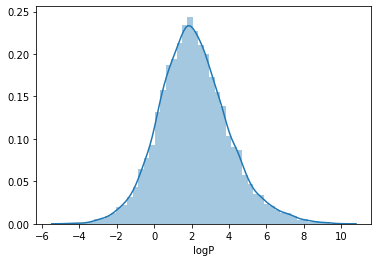

In [9]:
sns.distplot(dataset_wo_averaging[VALUE_COLUMN])

In [11]:
ranges = [-20, -10, -5, 0, 10, 20, 30, 40, 50]
dataset_wo_averaging[VALUE_COLUMN].groupby(pd.cut(dataset_wo_averaging[VALUE_COLUMN], ranges)).count()

logP
(-20, -10]        0
(-10, -5]         0
(-5, 0]        1541
(0, 10]       12236
(10, 20]          0
(20, 30]          0
(30, 40]          0
(40, 50]          0
Name: logP, dtype: int64

In [13]:
DATASET_OTPUT_PATH = '../data/3_final_data/'

In [14]:
dataset_wo_averaging.to_csv(os.path.join(DATASET_OTPUT_PATH,'logp_wo_averaging.csv'))

## Split logp data

In [1]:
def train_test_validation_split(df):
    from sklearn.model_selection import train_test_split
    train_data, rest_data = train_test_split(df, test_size=0.3)
    test_data, validation_data = train_test_split(rest_data, test_size=0.5)
    return train_data.reset_index(drop=True), validation_data.reset_index(drop=True), test_data.reset_index(drop=True)

In [2]:
DATA_PATH = '../data/3_final_data/'

file = 'logp_wo_averaging'

In [24]:
data = pd.read_csv(os.path.join(DATA_PATH, file+'.csv'))


print(file, 'shape: ', data.shape)    
train, validation, test = train_test_validation_split(data)
print('SPLITTED SHAPES:\n\ttrain: {0}\n\tvalidation: {1}\n\ttest: {2}\n'.format(train.shape, validation.shape, test.shape))

train.to_csv(DATA_PATH + 'split_data/' + file + '_train.csv')
validation.to_csv(DATA_PATH + 'split_data/' + file + '_validation.csv')
test.to_csv(DATA_PATH + 'split_data/' + file + '_test.csv')

logp_wo_averaging shape:  (13777, 2)
SPLITTED SHAPES:
	train: (9643, 2)
	validation: (2067, 2)
	test: (2067, 2)



## Count max atom num in logP dataset

In [7]:
DATA_PATH = '../data/3_final_data/'

file = 'logp_wo_averaging'

In [10]:
data = pd.read_csv(os.path.join(DATA_PATH, file+'.csv'))

In [13]:
from rdkit import Chem, DataStructs

In [12]:
SMILES_COLUMN = 'smiles'

In [14]:
num_atoms = [Chem.MolFromSmiles(smiles).GetNumAtoms() for smiles in data[SMILES_COLUMN]]

In [15]:
max(num_atoms)

85

<AxesSubplot:>

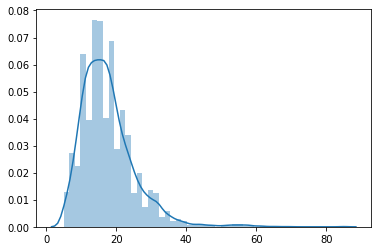

In [16]:
sns.distplot(num_atoms)

## Get number of hydrophilic and lipophilic molecules in logP dataset

In [1]:
import pandas as pd
import os

In [4]:
DATA_PATH = '../data/3_final_data/'

SMILES_COLUMN = 'smiles'
VALUE_COLUMN = 'logP'

file = 'logp_wo_averaging'

In [5]:
data = pd.read_csv(os.path.join(DATA_PATH, file+'.csv'))

In [6]:
print('Number of hydrophilic molecules = ', \
      len(data[data[VALUE_COLUMN]<0]))
print('Number of lipophilic molecules = ', \
      len(data[data[VALUE_COLUMN]>0]))


Number of hydrophilic molecules =  1523
Number of lipophilic molecules =  12236


# LogP without logp.json

In [1]:
import pandas as pd
import os
import seaborn as sns

In [2]:
DATASET_PATH = '../data/3_final_data/'
SMILES_COLUMN = 'smiles'
VALUE_COLUMN = 'logP'

In [3]:
dataset = pd.read_csv(os.path.join(DATASET_PATH, 'logP_wo_logp_json.csv'))

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  13953 non-null  object 
 1   logP    13953 non-null  float64
dtypes: float64(1), object(1)
memory usage: 218.1+ KB


In [5]:
dataset_wo_averaging = dataset.groupby([SMILES_COLUMN]).agg(lambda x:x.value_counts().index[0])

In [6]:
dataset_wo_averaging.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13688 entries, BrC(Br)(Br)Br to n1onc2c1NC1Nc3nonc3NC1N2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   logP    13688 non-null  float64
dtypes: float64(1)
memory usage: 213.9+ KB


In [8]:
DATASET_OTPUT_PATH = '../data/3_final_data/'

In [9]:
dataset_wo_averaging.to_csv(os.path.join(DATASET_OTPUT_PATH,'logp_wo_logp_json_wo_averaging.csv'))

## Split logp data

In [10]:
def train_test_validation_split(df):
    from sklearn.model_selection import train_test_split
    train_data, rest_data = train_test_split(df, test_size=0.3)
    test_data, validation_data = train_test_split(rest_data, test_size=0.5)
    return train_data.reset_index(drop=True), validation_data.reset_index(drop=True), test_data.reset_index(drop=True)

In [13]:
DATA_PATH = '../data/3_final_data/'

file = 'logp_wo_logp_json_wo_averaging'

In [14]:
data = pd.read_csv(os.path.join(DATA_PATH, file+'.csv'))


print(file, 'shape: ', data.shape)    
train, validation, test = train_test_validation_split(data)
print('SPLITTED SHAPES:\n\ttrain: {0}\n\tvalidation: {1}\n\ttest: {2}\n'.format(train.shape, validation.shape, test.shape))

train.to_csv(DATA_PATH + 'split_data/' + file + '_train.csv')
validation.to_csv(DATA_PATH + 'split_data/' + file + '_validation.csv')
test.to_csv(DATA_PATH + 'split_data/' + file + '_test.csv')

logp_wo_logp_json_wo_averaging shape:  (13688, 2)
SPLITTED SHAPES:
	train: (9581, 2)
	validation: (2054, 2)
	test: (2053, 2)



# logD wo pH dataset

In [1]:
import pandas as pd
import os
import seaborn as sns

In [11]:
DATA_PATH = "../data/3_final_data/"
DATASET_OUTPUT_PATH = '../data/3_final_data/'
SMILES_COLUMN = 'smiles'
VALUE_COLUMN = 'logD'
PH_COLUMN = 'pH'

In [3]:
logd_ph_data = pd.read_csv(os.path.join(DATA_PATH, 'logD_pH.csv'), index_col= 0)

In [4]:
logd_ph_data.head()

,smiles,pH,logD
0,Brc1c(-c2ccc3c(c2)OCO3)nc2ncccn12,7.4,3.48
1,Brc1c(NC2=NCCN2)ccc2nccnc12,7.4,0.31
2,Brc1c[nH]c(=NCc2ccccc2)nc1N=c1cc(C2CC2)[nH][nH]1,7.4,4.11
3,Brc1cc(Br)c(NC2=NCCN2)c(Br)c1,7.4,2.51
4,Brc1cc(Br)cc(COC[C@H](c2ccccc2)N2CCNCC2)c1,7.4,2.80


In [5]:
logd_data = logd_ph_data.drop(PH_COLUMN, axis = 1)

In [6]:
logd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5584 entries, 0 to 5583
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  5584 non-null   object 
 1   logD    5584 non-null   float64
dtypes: float64(1), object(1)
memory usage: 130.9+ KB


In [7]:
logd_data = logd_data.drop_duplicates()

In [8]:
logd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5578 entries, 0 to 5583
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  5578 non-null   object 
 1   logD    5578 non-null   float64
dtypes: float64(1), object(1)
memory usage: 130.7+ KB


In [9]:
logd_wo_averaging = logd_data.groupby([SMILES_COLUMN]).agg(lambda x:x.value_counts().index[0])

In [10]:
logd_wo_averaging.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5515 entries, Brc1c(-c2ccc3c(c2)OCO3)nc2ncccn12 to c1nc(N2CCCCC2)c2[nH]cnc2n1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   logD    5515 non-null   float64
dtypes: float64(1)
memory usage: 86.2+ KB


<AxesSubplot:xlabel='logD'>

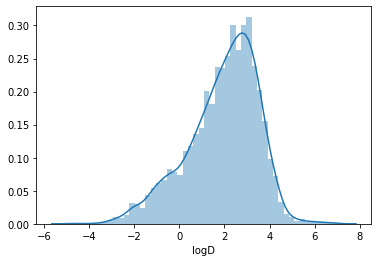

In [14]:
sns.distplot(logd_wo_averaging[VALUE_COLUMN])

In [18]:
ranges = [-10,-6, -4, -2, 0, 2, 4, 6, 8, 10]
logd_wo_averaging[VALUE_COLUMN].groupby(pd.cut(logd_wo_averaging[VALUE_COLUMN], ranges)).count()

logD
(-10, -6]       0
(-6, -4]        3
(-4, -2]       92
(-2, 0]       623
(0, 2]       1811
(2, 4]       2712
(4, 6]        261
(6, 8]         13
(8, 10]         0
Name: logD, dtype: int64

In [19]:
logd_wo_averaging.to_csv(os.path.join(DATASET_OUTPUT_PATH,'logd_wo_averaging.csv'))

## LogD_only_Lipophilicity dataset

In [1]:
import pandas as pd
import os
import seaborn as sns

In [4]:
DATA_PATH = "../data/2_standardize/logd"
DATASET_OUTPUT_PATH = '../data/3_final_data/'
SMILES_COLUMN = 'smiles'
VALUE_COLUMN = 'logD'
PH_COLUMN = 'pH'

In [9]:
logd_lip_data = pd.read_csv(os.path.join(DATA_PATH, 'normal_logd_lipophilicity_dataset.csv'))

In [14]:
logd_data = logd_lip_data.drop(PH_COLUMN, axis = 1)

In [15]:
logd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   logD    4198 non-null   float64
 1   smiles  4198 non-null   object 
dtypes: float64(1), object(1)
memory usage: 65.7+ KB


In [17]:
logd_data = logd_data.drop_duplicates()

In [18]:
logd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 0 to 4197
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   logD    4194 non-null   float64
 1   smiles  4194 non-null   object 
dtypes: float64(1), object(1)
memory usage: 98.3+ KB


In [19]:
logd_wo_averaging = logd_data.groupby([SMILES_COLUMN]).agg(lambda x:x.value_counts().index[0])

In [20]:
logd_wo_averaging.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4166 entries, Brc1c[nH]c(=NCc2ccccc2)nc1N=c1cc(C2CC2)[nH][nH]1 to c1nc(N2CCCCC2)c2[nH]cnc2n1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   logD    4166 non-null   float64
dtypes: float64(1)
memory usage: 65.1+ KB


In [21]:
logd_wo_averaging.to_csv(os.path.join(DATASET_OUTPUT_PATH,'logd_Lip_wo_averaging.csv'))

## logD data split

In [7]:
def train_test_validation_split(df):
    from sklearn.model_selection import train_test_split
    train_data, rest_data = train_test_split(df, test_size=0.3)
    test_data, validation_data = train_test_split(rest_data, test_size=0.5)
    return train_data.reset_index(drop=True), validation_data.reset_index(drop=True), test_data.reset_index(drop=True)

In [21]:
DATA_PATH = '../data/3_final_data/'

file = 'logd_wo_averaging'

In [22]:
data = pd.read_csv(os.path.join(DATA_PATH, file+'.csv'))


print(file, 'shape: ', data.shape)    
train, validation, test = train_test_validation_split(data)
print('SPLITTED SHAPES:\n\ttrain: {0}\n\tvalidation: {1}\n\ttest: {2}\n'.format(train.shape, validation.shape, test.shape))

train.to_csv(DATA_PATH + 'split_data/' + file + '_train.csv')
validation.to_csv(DATA_PATH + 'split_data/' + file + '_validation.csv')
test.to_csv(DATA_PATH + 'split_data/' + file + '_test.csv')

logd_wo_averaging shape:  (5515, 2)
SPLITTED SHAPES:
	train: (3860, 2)
	validation: (828, 2)
	test: (827, 2)



In [23]:
print('Number of hydrophilic molecules = ', \
      len(logd_wo_averaging[logd_wo_averaging[VALUE_COLUMN]<0]), round(len(logd_wo_averaging[logd_wo_averaging[VALUE_COLUMN]<0])))
print('Number of lipophilic molecules = ', \
      len(logd_wo_averaging[logd_wo_averaging[VALUE_COLUMN]>0]))


Number of hydrophilic molecules =  715
Number of lipophilic molecules =  4797


In [5]:
DATA_PATH = '../data/3_final_data/'

file = 'logd_Lip_wo_averaging'

In [9]:
data = pd.read_csv(os.path.join(DATA_PATH, file+'.csv'))


print(file, 'shape: ', data.shape)    
train, validation, test = train_test_validation_split(data)
print('SPLITTED SHAPES:\n\ttrain: {0}\n\tvalidation: {1}\n\ttest: {2}\n'.format(train.shape, validation.shape, test.shape))

train.to_csv(DATA_PATH + 'split_data/' + file + '_train.csv')
validation.to_csv(DATA_PATH + 'split_data/' + file + '_validation.csv')
test.to_csv(DATA_PATH + 'split_data/' + file + '_test.csv')

logd_Lip_wo_averaging shape:  (4166, 2)
SPLITTED SHAPES:
	train: (2916, 2)
	validation: (625, 2)
	test: (625, 2)

